<a href="https://colab.research.google.com/github/yashraj195/OlympicsEDA/blob/main/TokyoOlympics_medals_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
medal_count = pd.read_excel("Medals.xlsx")
medal_count

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [3]:
# Mean
medal_count['Total'].mean()

11.612903225806452

In [4]:
#Weighted Mean

import numpy as np

np.average(medal_count['Total'], weights = medal_count['Gold'])

46.832352941176474

In [5]:
#Trimmed Mean

from scipy.stats import trim_mean

trim_mean(medal_count['Gold'], 0.1)

1.96

In [6]:
#Median
medal_count['Total'].median()

4.0

In [7]:
#Weighted Median

def weighted_median(df, median_col, weight_col):
  df_sorted = df.sort_values(median_col)
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum() /2.
  return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, 'Total', 'Gold')

40

In [8]:
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

## Estimates of Variability (Dispersion Matrix)

In [9]:
#Variance

from statistics import variance

variance(medal_count["Gold"])

49.315100514259

In [10]:
#Standard Deviation

from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [11]:
#Mean Absolute Deviation

from numpy import mean, absolute

mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228565

In [12]:
#Median AQbsolute Deviation

from numpy import median, absolute

median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [13]:
#Interquantile range

q3, q1 = np.percentile(medal_count["Gold"], [75 ,25])
iqr = q3 -q1
iqr

3.0

## Estimates of Percentile

<Axes: >

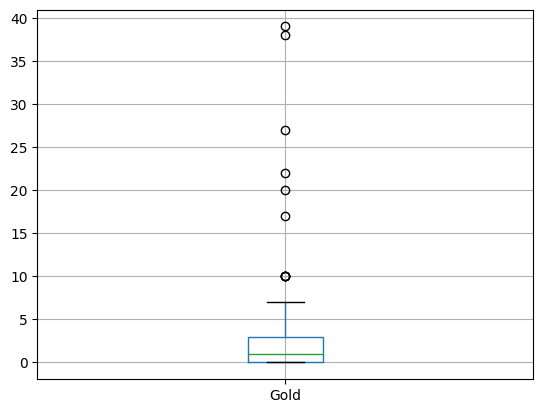

In [14]:
# Box Plots

medal_count.boxplot(column="Gold", by=None, ax=None)

In [15]:
#Frequency Table

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count['Gold'], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

<ipython-input-15-5b877ef54453>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table.groupby("freq")["Rank"].count().reset_index()


,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


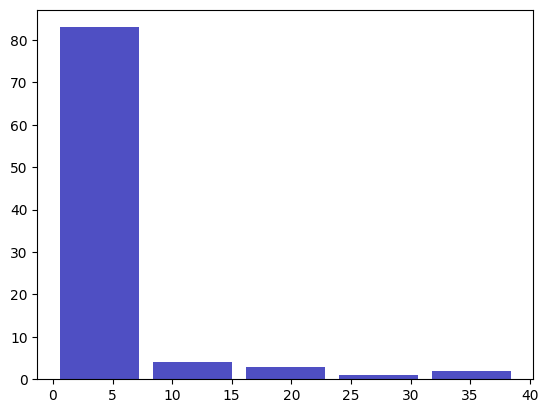

In [16]:
#Histogram

import matplotlib.pyplot as plt

plt.hist(medal_count["Gold"], bins=5, color ='#0504aa', alpha = 0.7, rwidth = 0.85)
plt.show()

<Axes: ylabel='Density'>

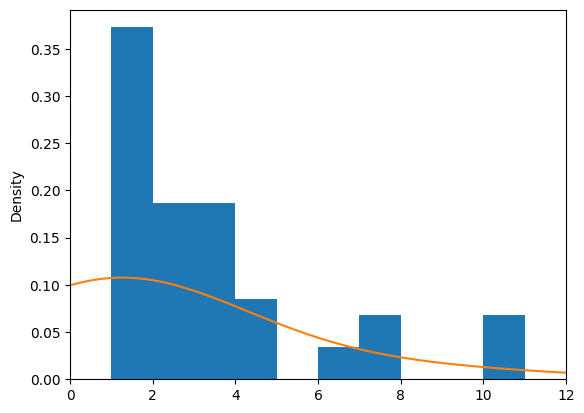

In [17]:
# density plot

ax = medal_count["Gold"].plot.hist(density=True, xlim =[0,12], bins = range(1,12))
medal_count["Gold"].plot.density(ax=ax)

##Exploring Binary and Categorical Data

In [18]:
medal_count["Gold"].mode()

,Gold
0,0


Text(0, 0.5, 'Country')

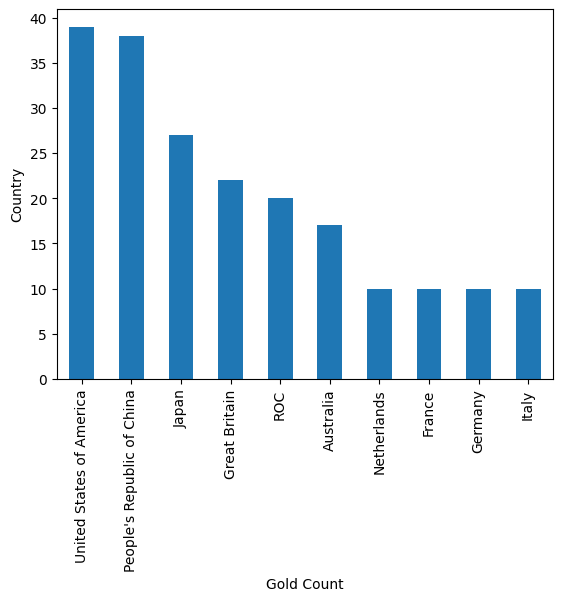

In [19]:
ax = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

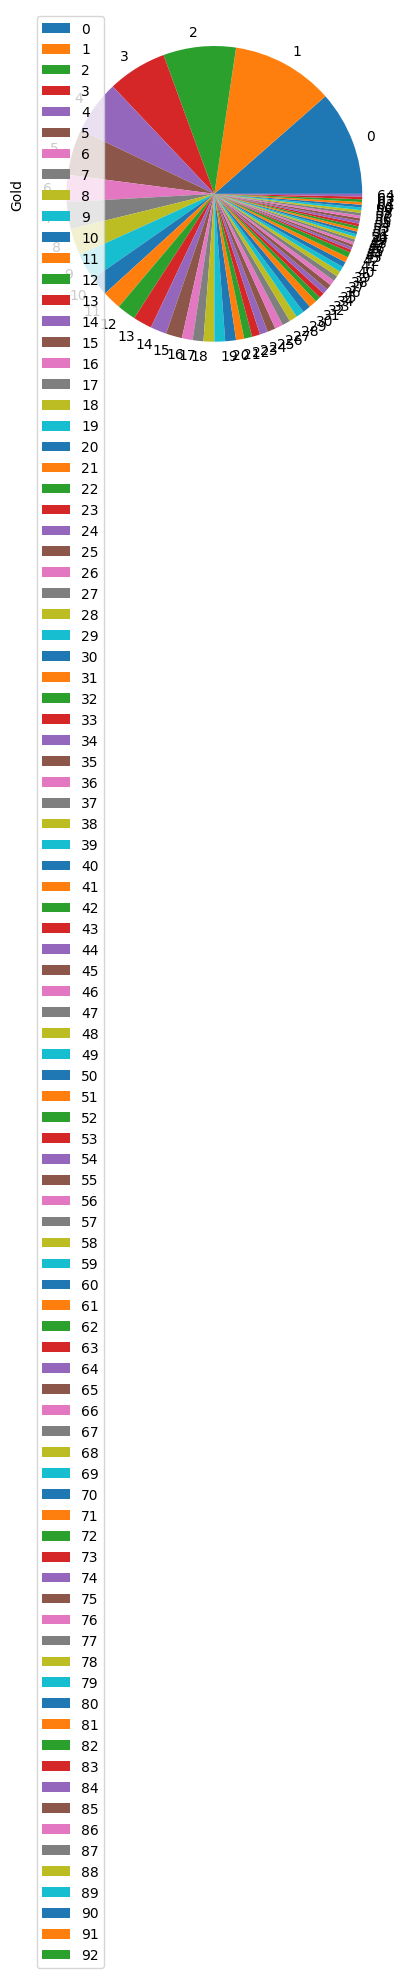

In [20]:
#Pie Chart

ax = medal_count.plot.pie(y="Gold")

([<matplotlib.patches.Wedge at 0x7a0b62d99c60>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

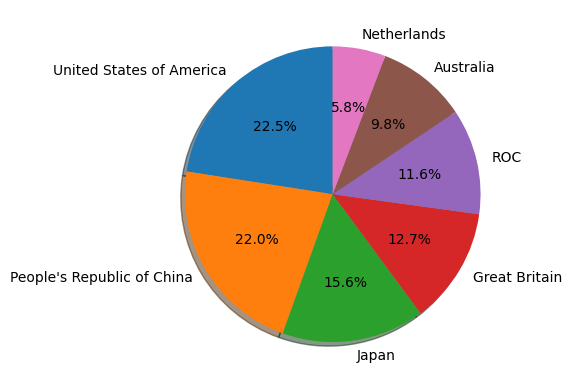

In [21]:
pie_data = medal_count.iloc[:7, :]

plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%', shadow=True, startangle=90)

## Correlation

In [22]:
# correlation

numerical_columns = medal_count.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<Axes: xlabel='Gold', ylabel='Silver'>

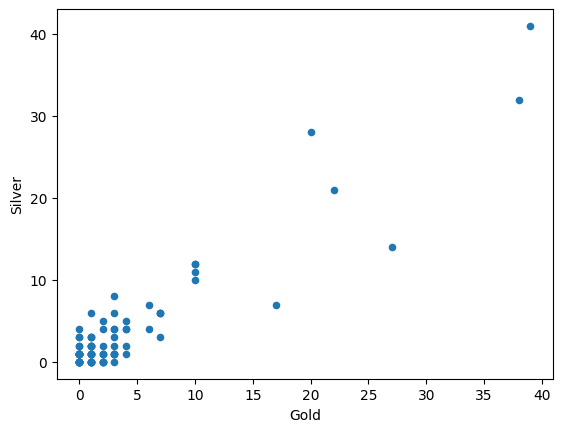

In [23]:
medal_count.plot.scatter(x="Gold",y="Silver")

<Axes: xlabel='Gold', ylabel='Silver'>

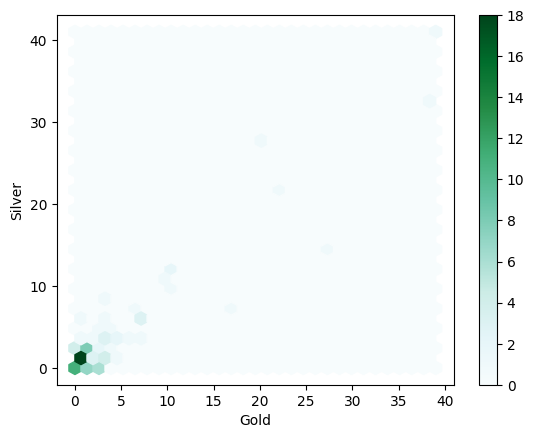

In [24]:
medal_count.plot.hexbin(x="Gold",y="Silver", gridsize=30, sharex=False)

<Axes: xlabel='Gold', ylabel='Silver'>

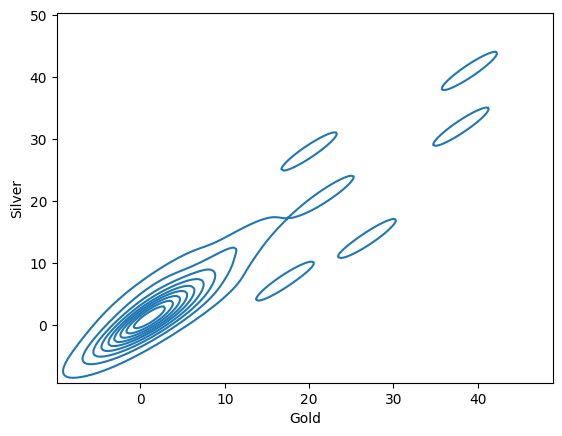

In [28]:
#Contour Plots

import seaborn as sns

ax = sns.kdeplot(x="Gold", y="Silver", data=medal_count)
ax

<Axes: >

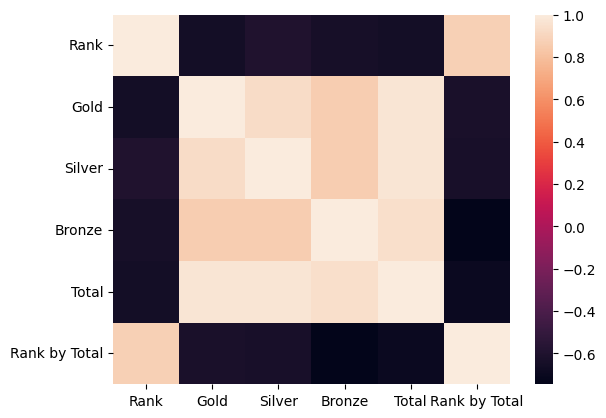

In [30]:
sns.heatmap(correlation_matrix)